<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/YB2%EC%A1%B0_miniproject3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 및 라이브러리 로딩

In [ ]:
import pandas as pd

train = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/movies_train.csv")
test = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/movies_test.csv")

## 데이터 탐색

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## 데이터 전처리

In [ ]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [ ]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [ ]:
train.head()

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0,91,2,23398,2012,11
1,(주)쇼박스,느와르,130,청소년 관람불가,2,387,3,7072501,2015,11
2,(주)쇼박스,액션,123,15세 관람가,4,343,4,6959083,2013,6
3,(주)NEW,코미디,101,전체 관람가,2,20,6,217866,2012,7
4,기타,코미디,108,15세 관람가,1,251,2,483387,2010,11


### 원핫 인코딩 방법 1

In [ ]:
# 원핫 인코딩(year : label encoding)
train_1 = pd.get_dummies(data = train,
                       columns = ['distributor', 'genre', 'screening_rat', 'month'],
                       prefix = ['distributor', 'genre', 'screening_rat', 'month'])
test_1 = pd.get_dummies(data = test,
                      columns = ['distributor', 'genre', 'screening_rat', 'month'],
                      prefix = ['distributor', 'genre', 'screening_rat', 'month'])

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(train_1['year'])

train_1['year'] = encoder.transform(train['year'])
test_1['year'] = encoder.transform(test['year'])

In [ ]:
train_1.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,year,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,96,0,91,2,23398,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,130,2,387,3,7072501,5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,123,4,343,4,6959083,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,101,2,20,6,217866,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,108,1,251,2,483387,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 원핫 인코딩 방법 2

In [ ]:
# 원 핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
# 모든 분석에서 공유하는 y_target, X_data, train, test 원본 생성
y_target_ori = train['box_off_num'] # y_target
X_data_ori = train.drop(['box_off_num'], axis=1, inplace=False) #X_data
train_ori = train
test_ori = test

In [ ]:
train_ori = train.copy()
test_ori = test.copy()

In [ ]:
train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,year,month,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## 1. 선형 회귀 - Scikitlearn LinearRegression 이용 / 점수 : 1987082.8993957036

In [ ]:
# 회귀분석에 필요한 나머지 모듈 불러오기
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

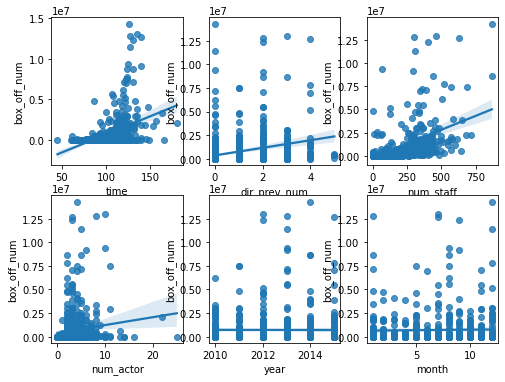

In [ ]:
#@ title 선형 회귀 관계가 뚜렷한 요소가 무엇인지 시각화로 알아보기 - 상관관계 크지 않은 듯.

# 1개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x1의 ax를 가짐.
fig, axs = plt.subplots(figsize=(8,6), ncols=3, nrows=2)
lm_features = ['time', 'dir_prev_num','num_staff','num_actor','year','month']
for i, feature in enumerate(lm_features):
  row = int(i/3)
  col = i%3
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='box_off_num', data=train, ax=axs[row][col])

In [ ]:
import numpy as np
# LinearRegression 클래스를 이용해 회귀 모델 만들기
y_target = y_target_ori
X_data = X_data_ori

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.4, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 1658169827181.501, RMSE: 1287699.432
Variance score: 0.193


In [ ]:
print('절편 값:', model.intercept_)
print('회귀 계수 값:', np.round(model.coef_, 1))

절편 값: -113922901.4654413
회귀 계수 값: [  11934.3  -65403.3    3968.3   97179.3   56182.5    6954.2  739536.9
 -486748.2  843810.2  561256.7 -658771.  -999084.7  361257.2 -328958.7
  694714.9  -22835.3 -385290.6 -109835.8 -201136.8 -438143.8 -547291.8
   -6329.9  531069.6  452781.1  163209.4   79490.2   77574.  -320273.6]


In [ ]:
# 회귀 계수를 큰 값 순서로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(model.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

distributor_(주)쇼박스        843810.2
distributor_(주)NEW        739536.9
genre_느와르                 694714.9
distributor_CJ 엔터테인먼트     561256.7
genre_액션                  531069.6
genre_코미디                 452781.1
genre_SF                  361257.2
screening_rat_12세 관람가     163209.4
num_actor                  97179.3
screening_rat_15세 관람가      79490.2
screening_rat_전체 관람가       77574.0
year                       56182.5
time                       11934.3
month                       6954.2
num_staff                   3968.3
genre_애니메이션                -6329.9
genre_다큐멘터리               -22835.3
dir_prev_num              -65403.3
genre_멜로/로맨스             -109835.8
genre_뮤지컬                -201136.8
screening_rat_청소년 관람불가   -320273.6
genre_공포                 -328958.7
genre_드라마                -385290.6
genre_미스터리               -438143.8
distributor_(주)마운틴픽쳐스    -486748.2
genre_서스펜스               -547291.8
distributor_기타           -658771.0
distributor_롯데엔터테인먼트     -999084.7
dtype: float64

In [ ]:
#@title 하이퍼파라미터 튜닝
# 하이퍼파라미터 후보들
param_grid = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs':[1, -1],
              'positive':[True, False]}

# GridSearchCV를 사용하여 모델과 파라미터 그리드를 입력하여 튜닝 수행
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 평가 점수 출력
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
Best Score: 0.2625811510266941


### 결론: LinearRegression()에서 그냥 하이퍼파라미터 튜닝하는 데에는 별 의미가 없음.
참고) LinearRegression()에서 제공되는 파라미터:

1. copy_X:
   - 이 파라미터는 데이터 배열 X를 복사하여 사용할지를 결정합니다.
   - 기본값은 True입니다. True로 설정하면 X의 복사본을 사용하여 연산을 수행하며, False로 설정하면 X의 원래 배열을 사용합니다.
   - 복사본을 사용하는 것이 안전하며, 원래 데이터를 변경하지 않으려는 경우에는 기본값인 True를 유지하는 것이 좋습니다.

2. fit_intercept:
   - 이 파라미터는 회귀식에서 절편(intercept)을 사용할지 여부를 결정합니다.
   - 기본값은 True입니다. True로 설정하면 회귀식에 절편을 포함시키고, False로 설정하면 절편을 포함하지 않습니다.
   - 데이터가 원점을 지나지 않는 경우에는 절편을 포함하는 것이 일반적이며, 데이터가 원점을 지날 것으로 예상되는 경우에는 절편을 포함하지 않는 것이 좋습니다.

3. n_jobs:
   - 이 파라미터는 병렬 처리에 사용할 CPU 코어의 수를 지정합니다.
   - 기본값은 1이며, 단일 CPU 코어를 사용하는 것을 의미합니다.
   - 값을 -1로 설정하면 모든 가능한 CPU 코어를 사용하여 병렬 처리를 수행합니다. 여러 개의 CPU 코어가 있는 경우, 속도를 높일 수 있습니다.

4. positive:
   - 이 파라미터는 예측값이 양수로 제한되도록 설정할지를 결정합니다.
   - 기본값은 False입니다. False로 설정하면 예측값에 제한이 없으며, True로 설정하면 예측값이 양수로 제한됩니다.
   - 일부 문제에서 음수 예측값이 불가능하거나 의미가 없는 경우에는 True로 설정하여 제한을 적용할 수 있습니다.

이상이 LinearRegression()에서 제공되는 네 개의 파라미터에 대한 설명입니다.

In [ ]:
#@title 로지스틱 회귀를 이용해 하이퍼파라미터 튜닝 - 2177123.666719497 (GridSearchCV 이용하니 점수 더 안 좋게 나옴..)
# # 로지스틱 회귀를 이용해 학습 및 예측 수행
# from sklearn.linear_model import LogisticRegression

# lr_clf = LogisticRegression()
# lr_clf.fit(X_train, y_train)
# lr_preds = lr_clf.predict(X_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {'penalty': ['l2', 'l1'],
#           'C': [0.01, 0.1, 1, 1, 5, 10]}

# grid_clf = GridSearchCV(lr_clf, params, scoring='accuracy', cv=2)
# grid_clf.fit(X_train, y_train)
# print('최적하이퍼파라미터:{0}, 최적평균정확도:{1:.3f}'.format(grid_clf.best_params_,
#                                               grid_clf.best_score_))

In [ ]:
# # 선형 회귀 OLS로 학습/예측/평가 수행
# lr_clf = LogisticRegression(C=0.01, penalty='l2')
# lr_clf.fit(X_train, y_train)
# lr_preds = lr_clf.predict(X_test)

# # 제출파일 만들기
# pred = lr_clf.predict(test)
# submission = pd.read_csv('submission.csv')
# submission['box_off_num'] = pred
# submission.to_csv('베이스라인2.csv',index = False)

### step2. 로그 변환, 음수 결괏값 절댓값으로 바꾸기

<AxesSubplot:>

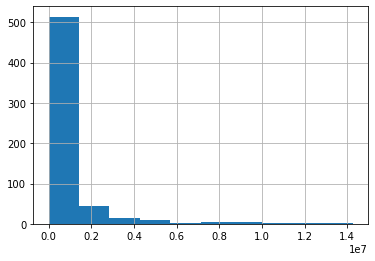

In [ ]:
#@title y_target의 분포 - 왜곡된 분포를 보이므로 log변환하는 것이 바람직함.
y_target.hist()

<AxesSubplot:>

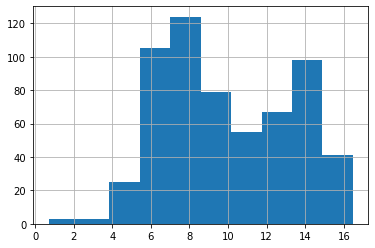

In [ ]:
y_log_transform = np.log1p(y_target) # log 변환
y_log_transform.hist()

In [ ]:
# 초기화
y_target = y_target_ori
X_data = X_data_ori
test = test_ori

y_target_log = np.log1p(y_target)
X_data['num_actor'] = np.log1p(X_data['num_actor'])
# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.4, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환해야 함.
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

In [ ]:
#@title 선형회귀, (관객 수) 로그변환 점수: 1987078.4860384474 (로그스케일 그대로, 원래 스케일로 바꾸면 제출 불가능)
# 제출파일 만들기
pred_log = model.predict(test)
pred = np.expm1(pred_log)
# 모두 양수이므로 절댓값 취하는 것은 의미 없음

submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission['box_off_num'] = pred
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/베이스라인_선형회귀_로그변환ver1.csv',index = False)

<AxesSubplot:>

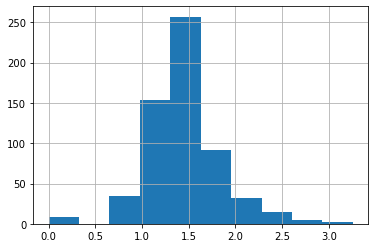

In [ ]:
#@title * 출연 배우 수의 분포 - 왜곡된 분포
X_data['num_actor'].hist()

<AxesSubplot:>

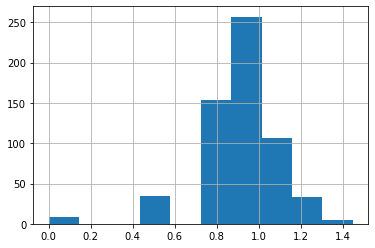

In [ ]:
#@title log 변환하자 왜곡 완화됨
np.log1p(X_data['num_actor']).hist()

In [ ]:
#@title 선형 회귀, (관객 수, 배우 수) 로그변환 점수: 1987078.521663809 (로그스케일 그대로. 원래 스케일로 바꾸면 제출 불가능)
# 초기화
y_target = y_target_ori
X_data = X_data_ori
test = test_ori

y_target_log = np.log1p(y_target)
X_data['num_actor'] = np.log1p(X_data['num_actor'])

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.4, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환해야 함.
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

C:\Users\park jihyun\AppData\Local\Temp\ipykernel_11208\105900029.py:20: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)


In [ ]:
# test 로그변환한 후 선형회귀
test['num_actor'] = np.log1p(test['num_actor'])

# 제출파일 만들기
pred_log = lr_reg.predict(test)
pred = np.expm1(pred_log)
# 모두 양수이므로 절댓값 취하는 것은 의미 없음

# 기타 제출값 error 발생.
# 원래 스케일로 변환하지 않으니 점수가 더 좋게 나옴...
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission['box_off_num'] = pred
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/베이스라인_선형회귀ver2.csv',index = False)

## 2. GradientBoostingRegressor / 점수 : 1254130.8483505715

In [ ]:
train_x = train.drop(['box_off_num'], axis=1)
train_y = train['box_off_num']
test_x = test

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

param_grid = [
    {'learning_rate':[0.01,0.005,0.007],
#'subsample':[0.25,0.5,0.75], #샘플 비율
'min_samples_split':[10,20,30], #내부 노드를 분할하는 데 필요한 최소 샘플수
#'min_samples_leaf':[5,10,15], #리프 노드에 필요한 최소 샘플 수
'max_depth':[3,15,30],
'n_estimators':[300,600,900],
#'min_impurity_decrease':[3,6,9], #이 분할로 인해 이 값보다 큰 불순물 감소를 유도하는 경우 노드가 분할
#'alpha':[0.3,0.6,0.9], #손실 함수의 알파-사분위수
#'max_leaf_nodes':[2,8,14], #최대 리프 노드를 가진 트리를 최선 우선 방식으로 성장
#'validation_fraction':[0.25,0.5,0.75], #조기 중지를 위해 유효성 검사 세트로 따로 설정할 훈련 데이터의 비율
    }]

kfold = KFold(n_splits=5, shuffle = True, random_state=0)
gb_clf = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_clf, param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(train_x, train_y)

print(grid_search.best_estimator_)

GradientBoostingRegressor(learning_rate=0.007, min_samples_split=30,
                          n_estimators=300)


In [ ]:
# learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=700 + 절댓값 점수: 1254130.8483505715
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=4, learning_rate=0.01,min_samples_split=10,
                           n_estimators=700, random_state=156)
gb_clf.fit(train_x, train_y)
pred_gb = gb_clf.predict(test_x)

In [ ]:
import numpy as np

y_pred_abs_gb = np.zeros(243)

for i in range(len(pred_gb)):
    if pred_gb[i] > 0:
        y_pred_abs_gb[i] = pred_gb[i]
    else:
        y_pred_abs_gb[i] = - pred_gb[i]

In [ ]:
# 제출 파일 생성

submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")

submission['box_off_num'] = y_pred_abs_gb

submission

,title,box_off_num
0,용서는 없다,1.265275e+06
1,아빠가 여자를 좋아해,1.373929e+06
2,하모니,1.238064e+06
3,의형제,3.015830e+06
4,평행 이론,1.070228e+06
...,...,...
238,해에게서 소년에게,1.076141e+05
239,울보 권투부,2.273227e+04
240,어떤살인,3.502150e+05
241,말하지 못한 비밀,2.379769e+04


In [ ]:
# csv 파일로 저장합니다.
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/submission_grid.csv', index=False)

## 3. 스태킹 / 점수 : 1984493.5835811521

In [ ]:
# 배우 수 로그변환
train['num_actor'] = np.log1p(train['num_actor'])
test['num_actor'] = np.log1p(test['num_actor'])

In [ ]:
# 타겟인 관객 수 로그변환
train['box_off_num'] = np.log1p(train['box_off_num'])

In [ ]:
train_x = train.drop(['box_off_num'], axis= 1)
train_y = train['box_off_num']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
# 개별 모델 선언
model_rf = RandomForestRegressor(n_estimators=100,max_depth=9,max_features=9,max_leaf_nodes=14,
                               min_samples_leaf=9, min_samples_split=2, random_state=156)
model_gb = GradientBoostingRegressor(max_depth=4, learning_rate=0.01,min_samples_split=10,
                           n_estimators=700, random_state=156)
model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

model_final_xgb = xgboost.XGBRegressor(learning_rate = 0.01, random_state=0)

In [ ]:
# 스태킹 모델
ensemble_model = StackingRegressor(estimators=[('rf', model_rf), ('gb', model_gb),
                                               ('lgbm', model_lgbm)], final_estimator = model_final_xgb)

In [ ]:
ensemble_model.fit(train_x, train_y)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=9,
                                                     max_features=9,
                                                     max_leaf_nodes=14,
                                                     min_samples_leaf=9,
                                                     random_state=156)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=4,
                                                         min_samples_split=10,
                                                         n_estimators=700,
                                                         random_state=156)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.4,
                                             learning_rate=0.05,
                        

In [ ]:
pred_st = ensemble_model.predict(test)
pred_st = np.abs(pred_st)
pred_st = np.expm1(pred_st)

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission['box_off_num'] = pred_st

# csv 파일로 저장
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/베이스라인.csv', index=False)
submission

,title,box_off_num
0,용서는 없다,5785.513672
1,아빠가 여자를 좋아해,7754.323730
2,하모니,7298.270996
3,의형제,7754.323730
4,평행 이론,7754.323730
...,...,...
238,해에게서 소년에게,94.060768
239,울보 권투부,157.076843
240,어떤살인,1298.738159
241,말하지 못한 비밀,145.008240


## 4. 랜덤포레스트 / 점수 : 1382583.21148

In [ ]:
train = train_ori
test = test_ori

In [ ]:
train_x = train.drop('box_off_num', axis=1)
train_y = train['box_off_num']
test_x = test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(train_x,train_y)
pred = model1.predict(test_x)

In [ ]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[50,100],
    'max_depth':[9,10,15],
    'min_samples_leaf':[9,15],
    'min_samples_split':[2],
    'max_features':[9,15],
    'max_leaf_nodes':[14]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

model = RandomForestRegressor(random_state=156)

cv = KFold(n_splits=5, shuffle=True, random_state=156)
grid_cv = GridSearchCV(model, param_grid=params, cv=cv)
grid_cv.fit(train_x,train_y)
print("최고 평균 정확도 : {0:4f}".format(grid_cv.best_score_))
print("최적 파라미터 : ", grid_cv.best_params_)

최고 평균 정확도 : 0.376314
최적 파라미터 :  {'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': 14, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor(n_estimators=100,max_depth=9,max_features=9,max_leaf_nodes=14,
                               min_samples_leaf=9, min_samples_split=2, random_state=156)

# 모델 학습
model.fit(train_x, train_y)
y_pred_rf = model.predict(test_x)

from sklearn.model_selection import cross_validate
cross_validate(model, train_x, train_y, cv=cv)

from sklearn.model_selection import cross_val_predict
y_pred1 = cross_val_predict(model, train_x, train_y, cv=cv)

from sklearn.model_selection import cross_val_score
y_valid_score = cross_val_score(model, train_x, train_y, cv=cv)  # 교차 검증별 정확도
import numpy as np
np.mean(y_valid_score)  # 교차 검증 평균

0.3744107374992541

In [ ]:
# 제출 파일 생성

submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")

submission['box_off_num'] = y_pred_rf

submission

,title,box_off_num
0,용서는 없다,2.184785e+06
1,아빠가 여자를 좋아해,1.309477e+06
2,하모니,1.658196e+06
3,의형제,2.022418e+06
4,평행 이론,1.472406e+06
...,...,...
238,해에게서 소년에게,1.030597e+05
239,울보 권투부,4.899137e+04
240,어떤살인,2.480824e+05
241,말하지 못한 비밀,7.001341e+04


In [ ]:
# csv 파일로 저장합니다.
submission.to_csv('submission_randomforest.csv', index=False)

## 5. LGBM / 점수 : 1465138.8497542497

In [ ]:
train = train_ori
test = test_ori

In [ ]:
# 배우 수 로그변환
train['num_actor'] = np.log1p(train['num_actor'])
test['num_actor'] = np.log1p(test['num_actor'])

In [ ]:
# 타겟인 관객 수 로그변환
train['box_off_num'] = np.log1p(train['box_off_num'])

In [ ]:
train_x = train.drop(['box_off_num'], axis= 1)
train_y = train['box_off_num']

In [ ]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=8,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_reg.fit(train_x, train_y)
pred_lgbm = lgbm_reg.predict(test)
pred_lgbm = np.abs(pred_lgbm)
pred_lgbm = np.expm1(pred_lgbm)

In [ ]:
pred_lgbm = np.expm1(pred_lgbm)

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission['box_off_num'] = pred_lgbm

# csv 파일로 저장
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/베이스라인.csv', index=False)
submission

,title,box_off_num
0,용서는 없다,2.399015e+05
1,아빠가 여자를 좋아해,2.490274e+06
2,하모니,2.518884e+05
3,의형제,2.646485e+06
4,평행 이론,1.219387e+06
...,...,...
238,해에게서 소년에게,2.085629e+02
239,울보 권투부,6.500205e+03
240,어떤살인,4.748964e+04
241,말하지 못한 비밀,2.860492e+03


## 6. XGBoostRegressor / 점수 : 1172918.38223

#### 모델 정의 및 학습

In [ ]:
# import package
import pandas as pd
import numpy as np
import xgboost # xgboost package 가 install 되었는지 확인
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(22)

In [ ]:
train_x = train_1.drop(['box_off_num'],axis= 1)
train_y = train_1['box_off_num']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
myxgb = xgboost.XGBRegressor(random_state=0)

params = {'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1, 0.15]}

# cv는 5으로 지정
gridcv = GridSearchCV(myxgb, param_grid=params, cv=5)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'learning_rate': 0.01}


In [ ]:
myxgb = xgboost.XGBRegressor(learning_rate = 0.01, random_state=0)
myxgb.fit(X_train, y_train)
y_pred = myxgb.predict(X_test)

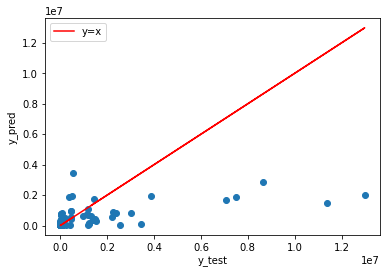

In [ ]:
import matplotlib.pyplot as plt
# visualization 1
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label = "y=x", color = "r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)

2478574563641.561

## 제출파일 생성

In [ ]:
pred = myxgb.predict(test_1)

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

,title,box_off_num
0,용서는 없다,9.135248e+05
1,아빠가 여자를 좋아해,9.484879e+05
2,하모니,6.543720e+05
3,의형제,2.242048e+06
4,평행 이론,5.899132e+05
...,...,...
238,해에게서 소년에게,3.021888e+04
239,울보 권투부,1.027254e+04
240,어떤살인,3.867070e+04
241,말하지 못한 비밀,1.645853e+04


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/xgboost1.csv',index = False)

### 하이퍼 파라미터를 좀 더 조정해보자.

In [ ]:
train_1.shape, test_1.shape

((600, 40), (243, 39))

In [ ]:
train_1.head(3)

,time,dir_prev_num,num_staff,num_actor,box_off_num,year,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,96,0,91,2,23398,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,130,2,387,3,7072501,5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,123,4,343,4,6959083,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
train_1.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', 'year',
       'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스',
       'distributor_CJ 엔터테인먼트', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [ ]:
train_x = train_1.drop(['box_off_num'],axis= 1)
train_y = train_1['box_off_num']

In [ ]:
# 최적값을 구하고 싶은 파라미터를 정리
from sklearn.model_selection import RandomizedSearchCV

dists = {
    'xgboostregressor__n_estimators' : [230,240,250,260,270,280],
    'xgboostregressor__max_depth' : [5,6,7],
    'xgboostregressor__gamma' : [0, 1, 2],
    'xgboostregressor__eta' : [0.01, 0.02, 0.03, 0.04, 0.05],
    'xgboostregressor__subsample' : [0.7,0.75, 0.8],
    'xgboostregressor__mean_child_weight' : [0.9, 1, 1.1],
    'xgboostregressor__importance_type' : ['gain'],
    'xgboostregressor__reg_lambda' : [0.9, 1, 1.1],
}

# RandomizedSearchCV 작성
regressor1 = RandomizedSearchCV(
    xgboost.XGBRegressor(random_state=0),
    param_distributions=dists, # 파라미터 입력
    n_iter = 50,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='neg_mean_squared_error',  # 오차 평가방법
    verbose=1,     # 진행상황
    random_state = 0
  )

regressor1.fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[20:38:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[20:38:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[20:38:40] WARNING: C:\buildkite-agent\builds\buildkit

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'xgboostregressor__gamma': [0, 1, 2],
                             

In [ ]:
# best_model = regressor1.best_estimator_
best_params = regressor1.best_params_

# print('best params: ', best_params)
# print('train score: {:.3f}'.format(np.sqrt(-regressor1.best_score_)))

# y_pred = best_model.predict(X)
# rmse_test = mean_squared_error(y, y_pred)**0.5
# print('test set score: ', (rmse_test))
best_params

{'xgboostregressor__subsample': 0.8,
 'xgboostregressor__reg_lambda': 1,
 'xgboostregressor__n_estimators': 260,
 'xgboostregressor__mean_child_weight': 1.1,
 'xgboostregressor__max_depth': 6,
 'xgboostregressor__importance_type': 'gain',
 'xgboostregressor__gamma': 2,
 'xgboostregressor__eta': 0.02}

In [ ]:
rgr = xgboost.XGBRegressor(
            n_estimators=260,
            max_depth=6,
            gamma = 2,
            eta = 0.02,
            subsample = 0.8,
            min_child_weight = 1,
            reg_lambda = 2,
            random_state=0
        ).fit(train_x, train_y)

time : 0.046547938138246536
dir_prev_num : 0.01689073070883751
num_staff : 0.05510883033275604
num_actor : 0.044762130826711655
year : 0.034113842993974686
month : 0.0198023971170187
distributor_(주)NEW : 0.012652773410081863
distributor_(주)마운틴픽쳐스 : 0.012805634178221226
distributor_(주)쇼박스 : 0.021911466494202614
distributor_CJ 엔터테인먼트 : 0.08579432219266891
distributor_기타 : 0.03564181178808212
distributor_롯데엔터테인먼트 : 0.03696652874350548
genre_SF : 0.013111087493598461
genre_공포 : 0.012543709017336369
genre_느와르 : 0.02218380570411682
genre_다큐멘터리 : 0.028150470927357674
genre_드라마 : 0.061388928443193436
genre_멜로/로맨스 : 0.0
genre_뮤지컬 : 0.013865077868103981
genre_미스터리 : 7.280551653821021e-05
genre_서스펜스 : 0.0014665223425254226
genre_애니메이션 : 0.01795918680727482
genre_액션 : 0.00929755624383688
genre_코미디 : 0.010318956337869167
screening_rat_12세 관람가 : 0.04609521105885506
screening_rat_15세 관람가 : 0.011748969554901123
screening_rat_전체 관람가 : 0.05697370320558548
screening_rat_청소년 관람불가 : 0.023281900212168694


<AxesSubplot:title={'center':'Top features'}>

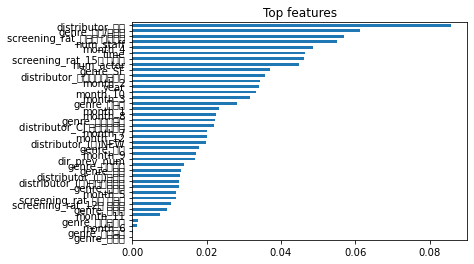

In [ ]:
for i, feature in enumerate(test.columns):
    print(f'{feature} : {rgr.feature_importances_[i]}')

importances = pd.Series(rgr.feature_importances_, train_x.columns)

n = 5
plt.title(f'Top features')
importances.sort_values().plot.barh()

In [ ]:
y_pred = rgr.predict(test_1)

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = y_pred
submission

,title,box_off_num
0,용서는 없다,1.590166e+06
1,아빠가 여자를 좋아해,1.659153e+06
2,하모니,9.550394e+05
3,의형제,1.916036e+06
4,평행 이론,1.567688e+06
...,...,...
238,해에게서 소년에게,1.065937e+05
239,울보 권투부,4.335977e+04
240,어떤살인,2.744755e+05
241,말하지 못한 비밀,2.198451e+04


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/hyper_xgboost.csv',index = False)

### 음이 나오는 것을 0으로 처리하면?

In [ ]:
y_pred_nonneg = np.zeros(243)
for i in range(len(y_pred)):
    if y_pred[i] > 0:
        y_pred_nonneg[i] = y_pred[i]
    else:
        y_pred_nonneg[i] = 0

In [ ]:
y_pred_nonneg.shape, y_pred.shape

((243,), (243,))

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = y_pred_nonneg
submission

,title,box_off_num
0,용서는 없다,1.590166e+06
1,아빠가 여자를 좋아해,1.659153e+06
2,하모니,9.550394e+05
3,의형제,1.916036e+06
4,평행 이론,1.567688e+06
...,...,...
238,해에게서 소년에게,1.065937e+05
239,울보 권투부,4.335977e+04
240,어떤살인,2.744755e+05
241,말하지 못한 비밀,2.198451e+04


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/hyper_pos_xgboost.csv',index = False)

### 음인 것에 절댓값을 씌워보면?

In [ ]:
len(y_pred_nonneg[y_pred_nonneg==0])

13

In [ ]:
y_pred_abs = np.zeros(243)
for i in range(len(y_pred)):
    if y_pred[i] > 0:
        y_pred_abs[i] = y_pred[i]
    else:
        y_pred_abs[i] = - y_pred[i]

In [ ]:
y_pred_abs.shape

(243,)

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = y_pred_abs
submission

,title,box_off_num
0,용서는 없다,1.590166e+06
1,아빠가 여자를 좋아해,1.659153e+06
2,하모니,9.550394e+05
3,의형제,1.916036e+06
4,평행 이론,1.567688e+06
...,...,...
238,해에게서 소년에게,1.065937e+05
239,울보 권투부,4.335977e+04
240,어떤살인,2.744755e+05
241,말하지 못한 비밀,2.198451e+04


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/hyper_abs_xgboost.csv',index = False)

### 로그변환해보기

- 타겟 값인 관객수를 로그변환
- 상영등급은 더미 변수
- 출연 배우 수는 로그변환

In [ ]:
train_x = train_1.drop(['box_off_num'],axis= 1)
train_y = train_1['box_off_num']

In [ ]:
# 타겟 값인 관객수를 로그변환
train_y = np.log1p(train_y)

In [ ]:
# 출연 배우 수의 로그 변환
train_x['num_actor'] = np.log1p(train_x['num_actor'])
test_log = test_1
test_log['num_actor'] = np.log1p(test_log['num_actor'])

In [ ]:
# 최적값을 구하고 싶은 파라미터를 정리
from sklearn.model_selection import RandomizedSearchCV

dists = {
    'xgboostregressor__n_estimators' : [230,240,250,260,270,280],
    'xgboostregressor__max_depth' : [5,6,7],
    'xgboostregressor__gamma' : [0, 1, 2],
    'xgboostregressor__eta' : [0.01, 0.02, 0.03, 0.04, 0.05],
    'xgboostregressor__subsample' : [0.7,0.75, 0.8],
    'xgboostregressor__mean_child_weight' : [0.9, 1, 1.1],
    'xgboostregressor__importance_type' : ['gain'],
    'xgboostregressor__reg_lambda' : [0.9, 1, 1.1],
}

# RandomizedSearchCV 작성
regressor_log = RandomizedSearchCV(
    xgboost.XGBRegressor(random_state=0),
    param_distributions=dists, # 파라미터 입력
    n_iter = 50,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='neg_mean_squared_error',  # 오차 평가방법
    verbose=1,     # 진행상황
    random_state = 0
  )

regressor_log.fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[20:44:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[20:44:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "xgboostregressor__eta", "xgboostregressor__gamma", "xgboostregressor__importance_type", "xgboostregressor__max_depth", "xgboostregressor__mean_child_weight", "xgboostregressor__n_estimators", "xgboostregressor__reg_lambda", "xgboostregressor__subsample" } are not used.

[20:44:11] WARNING: C:\buildkite-agent\builds\buildkit

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'xgboostregressor__gamma': [0, 1, 2],
                             

In [ ]:
# best_model = regressor_log.best_estimator_
best_params_log = regressor_log.best_params_

# print('best params: ', best_params)
# print('train score: {:.3f}'.format(np.sqrt(-regressor1.best_score_)))

# y_pred = best_model.predict(X)
# rmse_test = mean_squared_error(y, y_pred)**0.5
# print('test set score: ', (rmse_test))
best_params_log

{'xgboostregressor__subsample': 0.8,
 'xgboostregressor__reg_lambda': 1,
 'xgboostregressor__n_estimators': 260,
 'xgboostregressor__mean_child_weight': 1.1,
 'xgboostregressor__max_depth': 6,
 'xgboostregressor__importance_type': 'gain',
 'xgboostregressor__gamma': 2,
 'xgboostregressor__eta': 0.02}

In [ ]:
rgr_log = regressor_log.best_estimator_

In [ ]:
prediction_log = np.expm1([0 if x < 0 else x for x in rgr_log.predict(test_log)])

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = prediction_log
submission

,title,box_off_num
0,용서는 없다,895405.687500
1,아빠가 여자를 좋아해,368716.906250
2,하모니,731809.437500
3,의형제,830586.500000
4,평행 이론,979013.750000
...,...,...
238,해에게서 소년에게,558.435974
239,울보 권투부,5411.270996
240,어떤살인,58350.554688
241,말하지 못한 비밀,4485.887695


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/log_hyper.csv',index = False)

In [ ]:
# 절댓값
prediction_log_abs = np.expm1([-x if x < 0 else x for x in rgr_log.predict(test_log)])

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = prediction_log_abs
submission

,title,box_off_num
0,용서는 없다,895405.687500
1,아빠가 여자를 좋아해,368716.906250
2,하모니,731809.437500
3,의형제,830586.500000
4,평행 이론,979013.750000
...,...,...
238,해에게서 소년에게,558.435974
239,울보 권투부,5411.270996
240,어떤살인,58350.554688
241,말하지 못한 비밀,4485.887695


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/log_hyper_abs.csv',index = False)

## 점수 1500000. 이상인 것만 모아서 평균 내기 - GradientBoostingRegressor, 랜덤포레스트, LGBM, Xgboost

In [ ]:
# gradient : y_pred_abs_gb
# 랜덤 포레스트 y_pred_rf
# lgbm : pred_lgbm
# xgboost : prediction_log_abs

In [ ]:
pred_mean = (y_pred_abs_gb + y_pred_rf + pred_lgbm + prediction_log_abs) / 4

In [ ]:
submission = pd.read_csv("C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/영화 관객수/submission.csv")
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred_mean
submission

,title,box_off_num
0,용서는 없다,1.146342e+06
1,아빠가 여자를 좋아해,1.385599e+06
2,하모니,9.699893e+05
3,의형제,2.128830e+06
4,평행 이론,1.185259e+06
...,...,...
238,해에게서 소년에게,5.286021e+04
239,울보 권투부,2.090878e+04
240,어떤살인,1.760344e+05
241,말하지 못한 비밀,2.528937e+04


In [ ]:
submission.to_csv('C:/Users/park jihyun/Desktop/대학교 5학기 자료/ESAA 학회/학회 미니프로젝트3/mean.csv',index = False)